# Problem 5 - QRAM 

Almost all of us have heard about Random Access Memory (RAM). It is one of the most important components of a computer system which allows *stored information processing*. A computer's CPU directly interacts with RAM to access and process information. 

A property for data which is present in RAM is that it will have an **address** and a **value**. These properties are essential for the common operations which are required for data storage and processing.

<img src = 'resources/problem-5/ram-vector.jpg' width = 50%>

That's all fine but how do we define the concept of **memory** in quantum computing? How do you represent data in quantum bits? Let's constrain ourselves to the simple concept of arrays and see how we may store an array into qubits.

#### Example 

```python
arr = [3, 4, 5, 6]
``` 

Each element **value** needs to be encoded into some qubits and there needs to be some notion of **indexing** present with our encoding. 

While a classical RAM would encode the data into bits, a **qRAM** would encode the data into a quantum state like the following - 

$$ |\Psi \rangle = \frac{|0\rangle V_0|0\rangle^{\otimes n} + |1\rangle V_1|0\rangle^{\otimes n} + |2\rangle V_2|0\rangle^{\otimes n} + |3\rangle V_3|0\rangle^{\otimes n}}{\sqrt{4}}$$

Here we can have two registers - one for the **indexing** and one for the **storage**. 

The first *ket* represents the **index qubits**. The numbers $0,1,2,3$ are indices and written in shorthand decimal format. Actually, the quantum state in the binary format they would be something like - 
    $$ |2\rangle \equiv |10\rangle $$
    
The operator $V_i$ represents the operator which would encode the $i^{th}$ value of the array into the **value qubits**

The second *ket* represents the **value qubits**. These qubits would store the values of the array elements. Note that the number of qubits, $n$ would be - 
    $$ n = \lfloor log_2(m) \rfloor + 1$$
    
where $\lfloor x \rfloor$ represents the [floor function](https://en.wikipedia.org/wiki/Floor_and_ceiling_functions) and $m$ is the maximum value available in the array. In the above example, $m$ would be just $6$ and we could use $3$ qubits for the value qubits. Note that value qubits are also encoded in the *binary* format.

Finally, the complete **qRAM** state for the array `[3, 4, 5, 6]` would be - 

$$ |\Psi \rangle = \frac{|00\rangle |011\rangle + |01\rangle |100\rangle + |10\rangle |101\rangle + |11\rangle |110\rangle}{\sqrt{4}}$$

In [1]:
## Enter Team ID 
import os 
os.environ["TEAMID"] = "Excalibur"

## Task
- Given different types of arrays and even quantum states, implement a **qRAM** which encodes the data into qubits
- Each level of this problem contains a different version of this task, with varying difficulty levels

### Level 1 - 75 points 
- You are given a $4$ element array with `1<=array[i]<m`
- `m` ranges from $[1,16]$
- You need to create a `QuantumCircuit` which encodes this array into qubits

#### Constraints
- The `QuantumCircuit` size should be equal to $\lfloor log_2(m)\rfloor + 3$ qubits 


In [2]:
from qiskit import QuantumCircuit
from numpy import *

#### To submit 
- Create a function which would accept parameters `m` and `array`

- `array` will contain only $4$ elements where each element `1<=arr[i]<m` 

- You need to return a `QuantumCircuit` object which would contain the encoded array as a *quantum state*


**NOTE** 
1. Please refrain from adding any kinds of statements other than comments in the designated code block, this may result in wrong output 
2. You can assume that the input params m and the array consist only of positive integers 
3. Note that the circuit **should not contain any measurement operations** as the full statevector of your quantum state would be compared 

In [6]:
def qram_4q(m, array):
    ### your code here
    size=int(floor(log2(m))+3)
    n=size-2
    qc=QuantumCircuit(size)
    binary=[]
    k=str(n)
    for i in array:
        binary.append(format(i, f'0{k}b'))
    i=0
    qc.h(0)
    qc.h(1)
    qc.x(0)
    qc.x(1)
    for j in range(1,n+1):
        if(binary[i][j-1]=='1'):
            qc.ccx(0,1,size-j)
    i=i+1
    qc.x(0)
    qc.x(1)
    qc.x(1)
    for j in range(1,n+1):
        if(binary[i][j-1]=='1'):
            qc.ccx(0,1,size-j)
    i=i+1
    qc.x(1)
    qc.x(0)
    for j in range(1,n+1):
        if(binary[i][j-1]=='1'):
            qc.ccx(0,1,size-j)
    i=i+1
    qc.x(0)
    for j in range(1,n+1):
        if(binary[i][j-1]=='1'):
            qc.ccx(0,1,size-j)
    return qc
    ### your code here 
    

### Testing
- Test your function before submitting to the grader

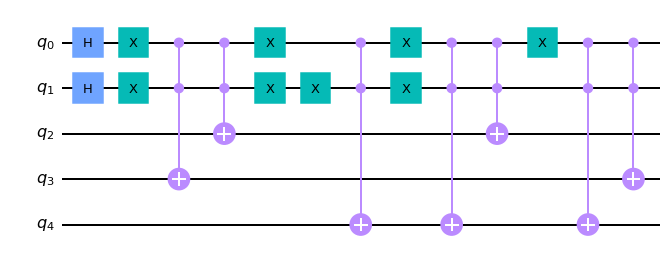

In [7]:
def test_function_1():
    m = 6
    array = [3, 4, 5, 6]
    qram = qram_4q(m, array)
    return qram 

test_function_1().draw('mpl')

In [5]:
from grader.graders.problem_5.grader import grader1 
grader1.evaluate(qram_4q)

2022-10-20 10:50:04.261901
6 cells appended.
Congratulations, your answer is correct!


### Level 2 - 125 points 
- You are given an `n` element array with `1<=array[i]<m`
- `n` is selected from one of ${2, 4, 8, 16}$
- `m` is an integer ranging from $[1,128]$
- You need to create a `QuantumCircuit` which encodes this array into qubits

#### Constraints
- The `QuantumCircuit` size should be equal to  ($\lceil log_2(n)\rceil + \lfloor log_2(m)\rfloor + 1$) qubits 


#### To submit 
- Create a function which would accept parameters `n`, `m` and `array`

- Array will contain `n` elements where each element `1<=arr[i]<m` 


- You need to return a `QuantumCircuit` object which would contain the encoded array as a *quantum state*


**NOTE** 
1. Please refrain from adding any kinds of statements other than comments in the designated code block, this may result in wrong output 
2. You can assume that the input params m and array consist only of positive integers 
3. Note that the circuit should not contain any measurement operations as the full statevector of your quantum state would be compared 

In [51]:
def qram_general(n, m, array):
    
    ### your code here 
    k=int(floor(log2(m))+1)
    l=int(log2(n))
    size=k+l
    qc=QuantumCircuit(size)
    index=list(range(l))
    binary=[]
    for i in array:
        binary.append(format(i, f'0{k}b'))
    qc.h(index)
    for i in range(n):
        b=format(i,f'0{l}b')
        inverted=[]
        for p in range(0,l):
            if(b[p]=='0'):
                qc.x(l-p-1)
                inverted.append(l-p-1)
        for j in range(1,k+1):
            if(binary[i][j-1]=='1'):
                qc.mct(index,size-j)
        for q in inverted:
            qc.x(q)
    return qc
    ### your code here 
    

### Testing
- Test your function before submitting to the grader

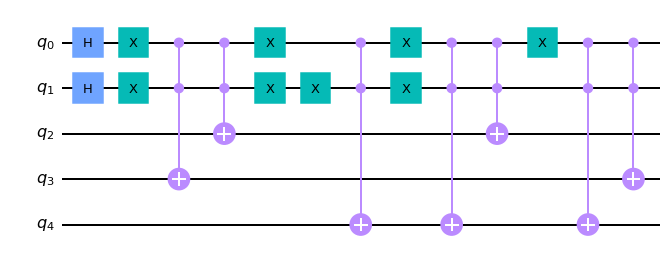

In [52]:
def test_function_2():
    n = 4
    m = 4
    array = [3,4,5,6]
    qram = qram_general(n, m, array)
    return qram 


test_function_2().draw('mpl')

In [53]:
from grader.graders.problem_5.grader import grader2 
grader2.evaluate(qram_general)

2022-10-20 11:28:53.864408
6 cells appended.
Congratulations, your answer is correct!


### Level 3 - 200 points
- Here we transform the problem a little!
- You are again given an array with sizes from one of $\{2, 4, 8, 16, 32\}$
- But now, you need to encode **quantum states** instead of integer values 
- Each of the given array element would be something like the following - 
```python 
array = [('x', 0.123), ('x', 0.912), ('z', -0.12), ('y', -0.36)]
```
- **Explanation** 
    - `('x', num_1)` means : 
        - State : $R_x(\theta_1)|0\rangle$ and $\theta_1 = 2\pi*num\_1$
    - `('y', num_2)` means : 
        - State : $R_y(\theta_2)|0\rangle$ and $\theta_2 = 2\pi*num\_2$
    - `('z', num_3)` means :
        - State : $R_z(\theta_3)|0\rangle$ and $\theta_3 = 2\pi*num\_3$
    
    
- The final qubits' state for the above example would be something like - 

$$ |qRAM\rangle = \frac{|0\rangle R_x(0.123*2\pi)|0\rangle + |1\rangle R_x(0.912*2\pi)|0\rangle + |2\rangle R_z(-0.12*2\pi)|0\rangle + |3\rangle R_y(-0.36*2\pi)|0\rangle}{\sqrt{4}}$$

#### Constraints 
- The size of the `QuantumCircuit` should be equal to $\lceil log_2(n) \rceil + 1$ qubits

#### To submit 
- Create a function which should accept the parameters `n` and `rotations`
- `n` would represent the number of elements present in the array 
- `rotations` array would be a list of 2-tuples as explained in the above cell
- Your function should return a `QuantumCircuit` which will encode the given `rotations` array into a quantum state



**NOTE** 
1. Please refrain from adding any kinds of statements other than comments in the designated code block, this may result in wrong output 
2. You can assume that the input params m and array consist only of positive integers 
3. Note that the circuit should not contain any measurement operations as the full statevector of your quantum state would be compared 

In [91]:
from qiskit.circuit.library import RYGate,RXGate,RZGate
def qram_rotations(n, rotations):
    
    ### your code here 
    l=int(log2(n))
    size=l+1
    qc=QuantumCircuit(size)
    index=list(range(l))
    full=list(range(size))
    qc.h(index)
    for i in range(n):
        b=format(i,f'0{l}b')
        inverted=[]
        for p in range(0,l):
            if(b[p]=='0'):
                qc.x(l-p-1)
                inverted.append(l-p-1)
        qc.barrier()
        if(rotations[i][0]=='x'):
            multirx = RXGate(rotations[i][1]*2*pi).control(l,label=None)
            qc.append(multirx,full)
        elif(rotations[i][0]=='y'):
            multiry = RYGate(rotations[i][1]*2*pi).control(l,label=None)
            qc.append(multiry,full)
        elif(rotations[i][0]=='z'):
            multirz = RZGate(rotations[i][1]*2*pi).control(l,label=None)
            qc.append(multirz,full)
        qc.barrier()
        for q in inverted:
            qc.x(q)
        qc.barrier()
    return qc
    ### your code here 

### Testing
- Test your function before submitting to the grader

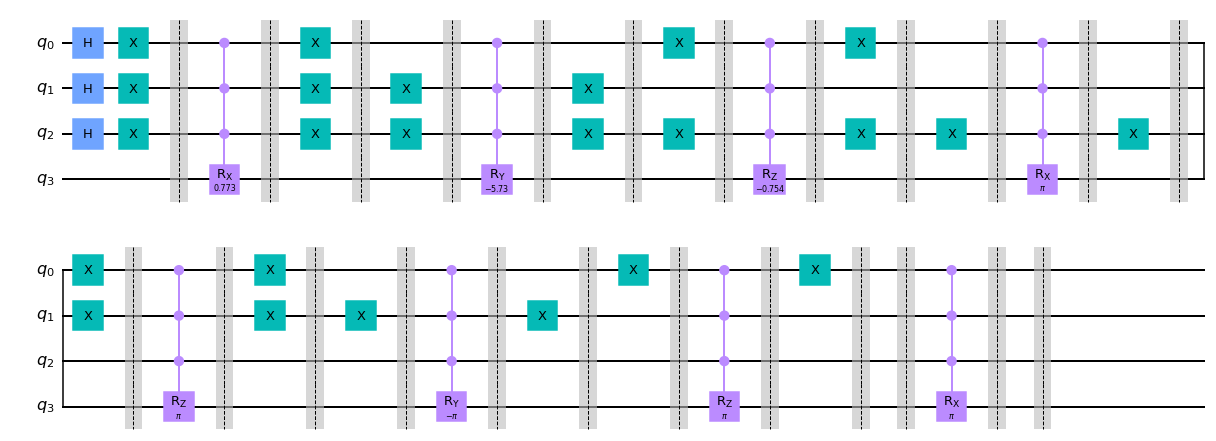

In [95]:
def test_function_3():
    n = 8
    rotations = [('x', 0.123), ('y', -0.912),('z',-0.12),('x', 0.5),('z',0.5),('y', -0.5),('z',0.5),('x', 0.5)]
    
    qram = qram_rotations(n, rotations)
    return qram 


test_function_3().draw('mpl')

In [96]:
from grader.graders.problem_5.grader import grader3 
grader3.evaluate(qram_rotations)

2022-10-20 12:26:56.365740
6 cells appended.
Congratulations, your answer is correct!
